# Import Necessary Library

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [14]:
import os
os.getcwd()

'C:\\Users\\rona\\DataMining'

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Customer_Feedback_Data.csv',
 'dmp_week2_homework_digma.ipynb',
 'draft homework.ipynb',
 'homework.ipynb',
 'nutrition_data_practice.ipynb',
 'Product_Offering_Data.csv',
 'Transaction_Data.csv']

# Load datasets

In [16]:
transactions = pd.read_csv("Transaction_Data.csv")
products = pd.read_csv("Product_Offering_Data.csv")
feedback = pd.read_csv("Customer_Feedback_Data.csv")

# Read Datasets

## Initial Data Inspection

In [34]:
transactions.info()
feedback.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_amount  5000 non-null   float64       
 4   transaction_type    5000 non-null   object        
 5   transaction_month   5000 non-null   period[M]     
 6   transaction_year    5000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1), period[M](1)
memory usage: 293.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4969 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              4969 non-null   int64  
 1   satisfaction_score  

### Transaction Data

In [17]:
transactions.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [18]:
transactions.tail()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
5045,3034,317,2023-05-07 09:00:00,3018.0,Purchase
5046,583,336,2023-01-25 06:00:00,2670.0,Bill Payment
5047,1211,550,2023-02-20 10:00:00,3252.0,Bill Payment
5048,2259,258,2023-04-05 02:00:00,3442.0,Purchase
5049,1159,271,2023-02-18 06:00:00,108.0,Loan Payment


### Product Offering Data

In [19]:
products.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [20]:
products.tail()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
10,2,Gold Savings Account,Savings Account,Low,NaN,Low
11,10,Travel Credit Card,Credit Card,Medium,NaN,Medium
12,3,High-Yield Investment Account,Investment,High,NaN,High
13,6,Personal Loan,Loan,Medium,NaN,Low
14,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium


### Customer Feedback Data

In [21]:
feedback.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [22]:
feedback.tail()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
5045,757,9.0,Good service,3
5046,969,2.0,Unsatisfactory,2
5047,248,4.0,Good service,3
5048,58,4.0,Unsatisfactory,10
5049,635,4.0,Very satisfied,6


## Standardize Column Names

In [35]:
transactions.columns = transactions.columns.str.lower()
feedback.columns = feedback.columns.str.lower()
products.columns = products.columns.str.lower()

#Column names were standardized to ensure consistency and avoid referencing errors during preprocessing

# Preprocessing

### Transaction Data Preprocessing

This dataset represents customer transaction behavior and requires cleaning to ensure accurate financial analysis.


In [24]:
# Remove duplicates
transactions.drop_duplicates(inplace=True)

# Handle missing values
transactions['transaction_amount'] = transactions['transaction_amount'].fillna(
    transactions['transaction_amount'].median()
)

transactions['transaction_type'] = transactions['transaction_type'].fillna(
    transactions['transaction_type'].mode()[0]
)

# Standardize date format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])


### Customer Feedback Data Preprocessing

Customer feedback provides insight into satisfaction and recommendation likelihood.


In [25]:
# Remove duplicates
feedback.drop_duplicates(inplace=True)

# Handle missing values
feedback['satisfaction_score'] = feedback['satisfaction_score'].fillna(
    feedback['satisfaction_score'].median()
)

feedback['likelihood_to_recommend'] = feedback['likelihood_to_recommend'].fillna(
    feedback['likelihood_to_recommend'].median()
)


### Product Offering Data Preprocessing

Product data describes FinMark’s offerings and target customer segments.


In [26]:
# Remove duplicates
products.drop_duplicates(inplace=True)

# Drop empty column
products = products.drop(columns=['target_age_group'])


# Feature Engineering

Transaction-level data was aggregated to derive customer-level behavioral features.

### Transaction-Based Features

In [27]:
transaction_features = transactions.groupby('customer_id').agg(
    total_transactions=('transaction_id', 'count'),
    total_spent=('transaction_amount', 'sum'),
    avg_transaction_amount=('transaction_amount', 'mean')
).reset_index()


### Time-Based Features

In [28]:
transactions['transaction_month'] = transactions['transaction_date'].dt.month
transactions['transaction_year'] = transactions['transaction_date'].dt.year

time_features = transactions.groupby('customer_id').agg(
    active_months=('transaction_month', 'nunique'),
    active_years=('transaction_year', 'nunique')
).reset_index()


### Customer Satisfaction Features
Captures spending intensity supports segmentation & trend detection

In [29]:
feedback_features = feedback.groupby('customer_id').agg(
    avg_satisfaction=('satisfaction_score', 'mean'),
    avg_recommendation=('likelihood_to_recommend', 'mean'),
    feedback_count=('feedback_comments', 'count')
).reset_index()


### Aggregation-Based Features

In [32]:
customer_value_features = transactions.groupby('customer_id').agg(
    total_transactions=('transaction_id', 'count'),
    total_spent=('transaction_amount', 'sum'),
    avg_transaction_amount=('transaction_amount', 'mean'),
    max_transaction_amount=('transaction_amount', 'max')
).reset_index()


## Relating Datasets

### Transaction Frequency and Patterns
Differentiates regular customers vs occasional users and detects customer engagement stability

In [ ]:
transactions['transaction_month'] = transactions['transaction_date'].dt.to_period('M')

frequency_features = transactions.groupby('customer_id').agg(
    active_months=('transaction_month', 'nunique'),
    transactions_per_month=('transaction_id', 'count')
).reset_index()

frequency_features['avg_transactions_per_month'] = (
    frequency_features['transactions_per_month'] /
    frequency_features['active_months']
)

### Transaction Type Distribution
Reveals preferred transaction behaviors and supports behavioral clustering

In [17]:
transaction_type_features = (
    transactions
    .groupby(['customer_id', 'transaction_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)


### Customer Satisfaction & Loyalty Indicators

In [18]:
feedback_features = feedback.groupby('customer_id').agg(
    avg_satisfaction=('satisfaction_score', 'mean'),
    avg_recommendation=('likelihood_to_recommend', 'mean'),
    feedback_count=('feedback_comments', 'count')
).reset_index()


### Domain-driven transformation
Combines emotional & behavioral intent and supports churn risk and loyalty modeling

In [19]:
feedback_features['loyalty_index'] = (
    feedback_features['avg_satisfaction'] +
    feedback_features['avg_recommendation']
) / 2


### Spending to Satisfaction Ratio
Detects high spend but low satisfaction (business risk) and highlights mismatches between value and experience

In [20]:
customer_features = customer_value_features.merge(
    feedback_features, on='customer_id', how='left'
)

customer_features['spend_satisfaction_ratio'] = (
    customer_features['total_spent'] /
    customer_features['avg_satisfaction']
)


# Merged Engineered Features
The cleaned and engineered datasets were merged to create a unified customer-level dataset.

In [30]:
final_df = transaction_features \
    .merge(time_features, on='customer_id', how='left') \
    .merge(feedback_features, on='customer_id', how='left')


# Final Validation

In [31]:
final_df.info()
final_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             993 non-null    int64  
 1   total_transactions      993 non-null    int64  
 2   total_spent             993 non-null    float64
 3   avg_transaction_amount  993 non-null    float64
 4   active_months           993 non-null    int64  
 5   active_years            993 non-null    int64  
 6   avg_satisfaction        993 non-null    float64
 7   avg_recommendation      993 non-null    float64
 8   feedback_count          993 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 69.9 KB


customer_id               0
total_transactions        0
total_spent               0
avg_transaction_amount    0
active_months             0
active_years              0
avg_satisfaction          0
avg_recommendation        0
feedback_count            0
dtype: int64

# Export Cleaned Dataset

In [ ]:
final_df.to_csv("FinMark_Cleaned_Engineered_Dataset.csv", index=False)

In [21]:
final_df = customer_features \
    .merge(frequency_features[['customer_id', 'avg_transactions_per_month']], 
           on='customer_id', how='left') \
    .merge(transaction_type_features, 
           on='customer_id', how='left')


In [22]:
final_df.info()
final_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 993 non-null    int64  
 1   total_transactions          993 non-null    int64  
 2   total_spent                 993 non-null    float64
 3   avg_transaction_amount      993 non-null    float64
 4   max_transaction_amount      993 non-null    float64
 5   avg_satisfaction            993 non-null    float64
 6   avg_recommendation          993 non-null    float64
 7   feedback_count              993 non-null    int64  
 8   loyalty_index               993 non-null    float64
 9   spend_satisfaction_ratio    993 non-null    float64
 10  avg_transactions_per_month  993 non-null    float64
 11  Bill Payment                993 non-null    int64  
 12  Investment                  993 non-null    int64  
 13  Loan Payment                993 non

customer_id                   0
total_transactions            0
total_spent                   0
avg_transaction_amount        0
max_transaction_amount        0
avg_satisfaction              0
avg_recommendation            0
feedback_count                0
loyalty_index                 0
spend_satisfaction_ratio      0
avg_transactions_per_month    0
Bill Payment                  0
Investment                    0
Loan Payment                  0
Purchase                      0
dtype: int64

In [23]:
print(final_df)

     customer_id  total_transactions  total_spent  avg_transaction_amount  \
0              1                   6      16836.0             2806.000000   
1              2                   2       4907.0             2453.500000   
2              3                   1       1538.0             1538.000000   
3              4                   2       8295.0             4147.500000   
4              5                   5      14798.0             2959.600000   
..           ...                 ...          ...                     ...   
988          996                   3       5773.0             1924.333333   
989          997                   4       8201.5             2050.375000   
990          998                   5      14211.0             2842.200000   
991          999                   9      23962.0             2662.444444   
992         1000                   6       9652.0             1608.666667   

     max_transaction_amount  avg_satisfaction  avg_recommendation  \
0     

In [25]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,993.0,500.871098,288.630791,1.0,251.000000,502.000000,750.000000,1000.000000
total_transactions,993.0,5.035247,2.185861,1.0,3.000000,5.000000,6.000000,13.000000
total_spent,993.0,15557.098691,33705.041501,286.0,7777.000000,11951.000000,16535.000000,489516.000000
avg_transaction_amount,993.0,3050.932464,6755.265169,286.0,2015.000000,2458.666667,2937.000000,144144.000000
max_transaction_amount,993.0,7036.453172,32703.191278,286.0,3592.000000,4347.000000,4734.000000,480300.000000
avg_satisfaction,993.0,5.716519,1.859119,1.0,4.750000,5.600000,6.500000,29.500000
avg_recommendation,993.0,5.570991,1.455399,1.0,4.571429,5.666667,6.500000,10.000000
feedback_count,993.0,4.969789,1.983067,1.0,4.000000,5.000000,6.000000,13.000000
loyalty_index,993.0,5.643755,1.182237,2.0,5.000000,5.571429,6.250000,17.250000
spend_satisfaction_ratio,993.0,2923.945832,5950.333182,57.2,1351.176471,2091.086957,3070.117647,80464.571429


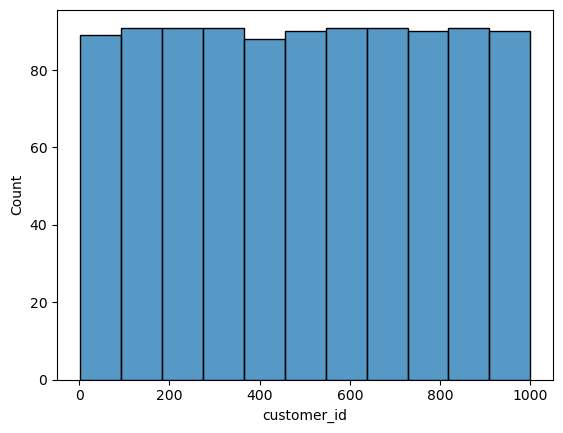

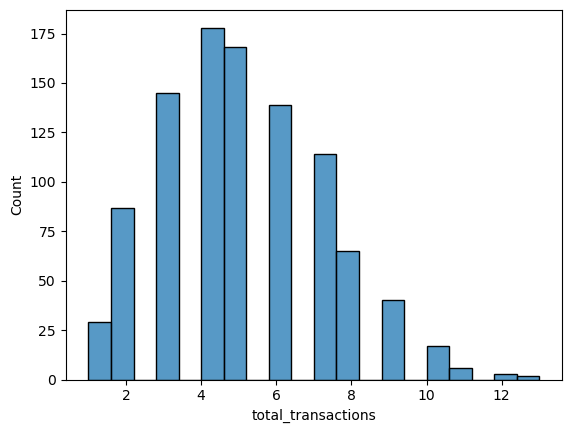

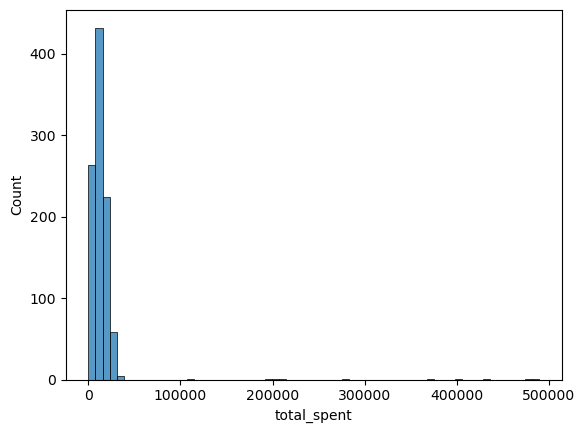

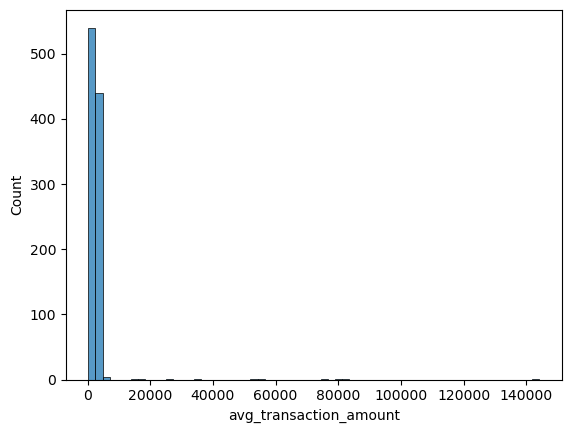

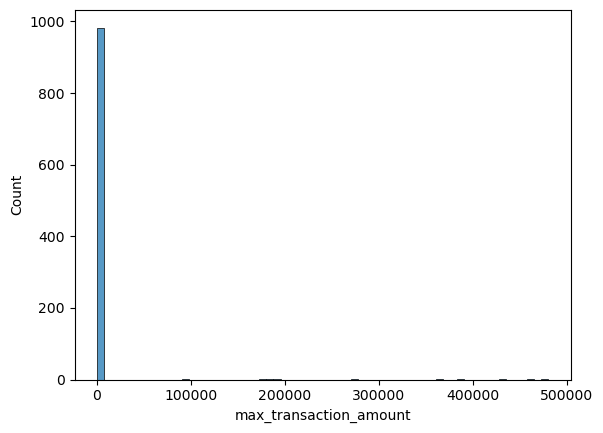

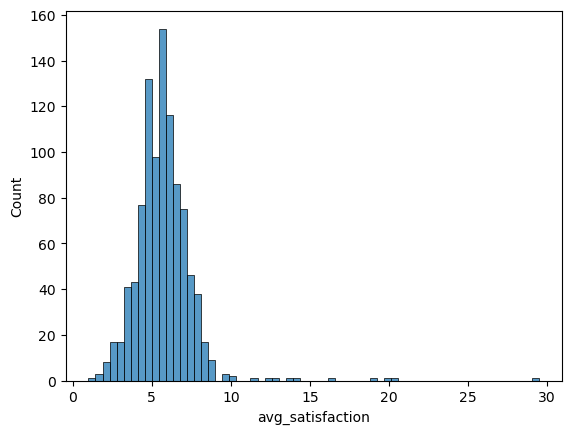

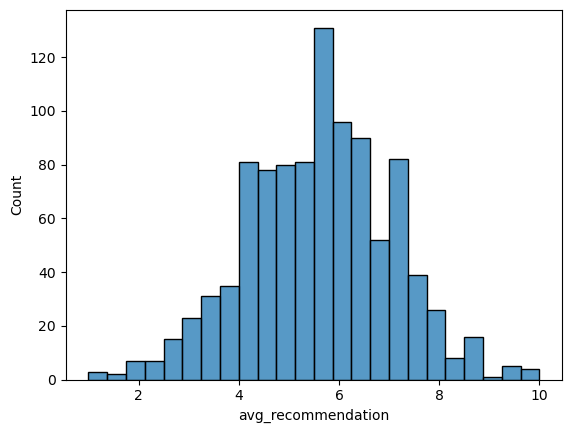

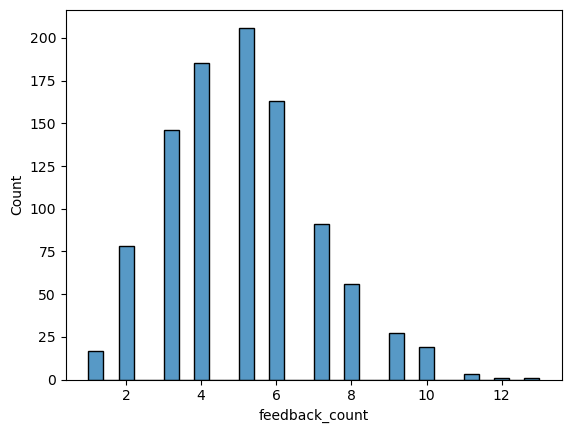

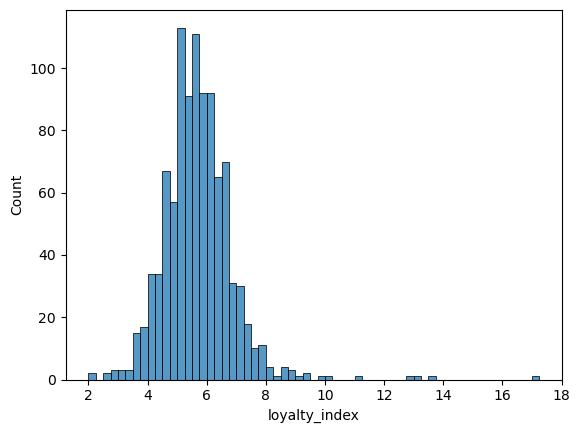

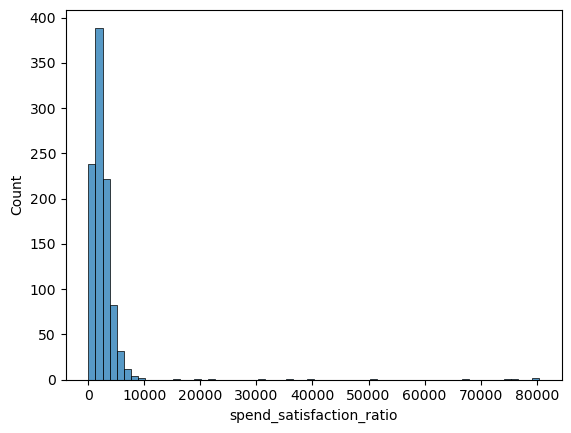

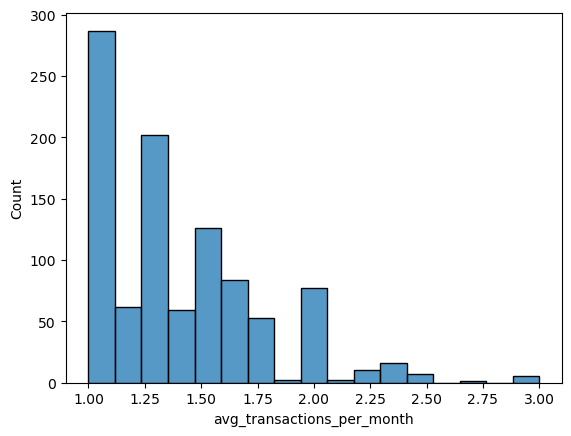

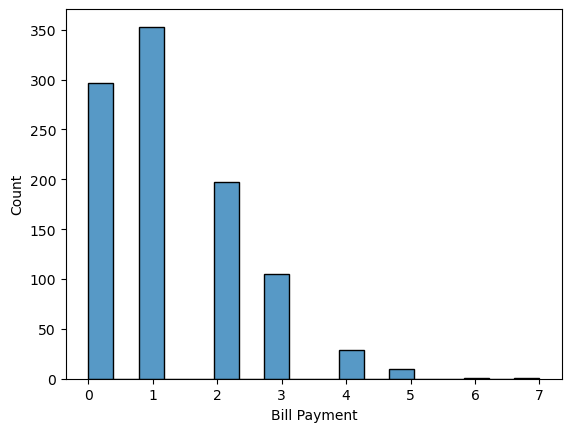

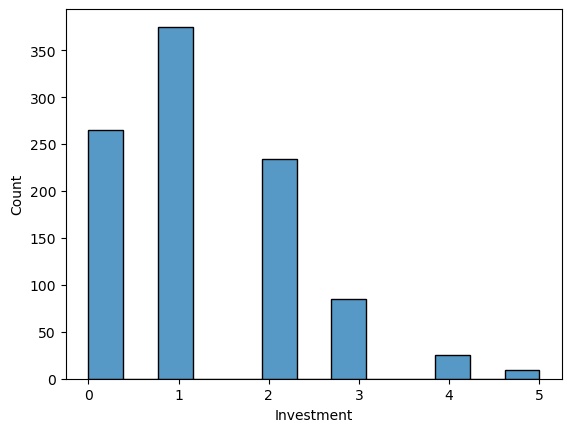

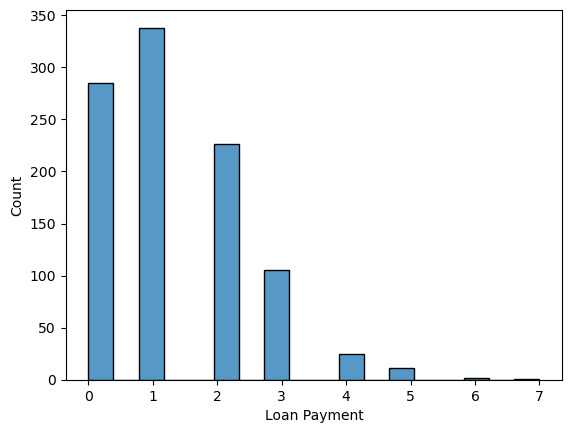

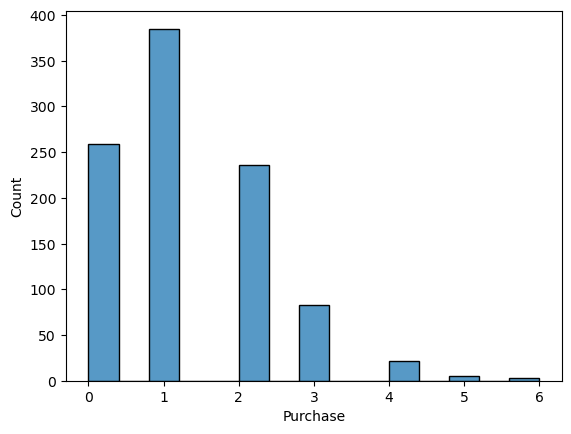

In [26]:
import warnings
warnings.filterwarnings("ignore")
for i in final_df.select_dtypes(include="number").columns:
    sns.histplot(data=final_df,x=i)
    plt.show()

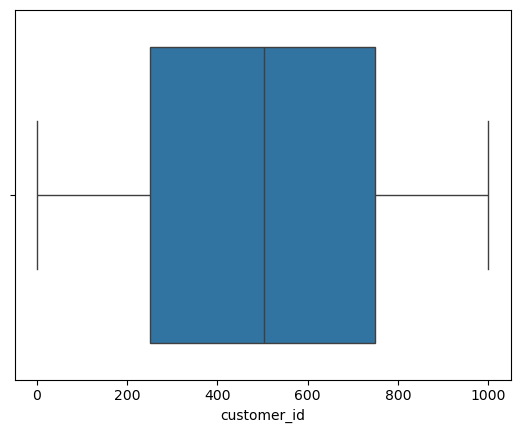

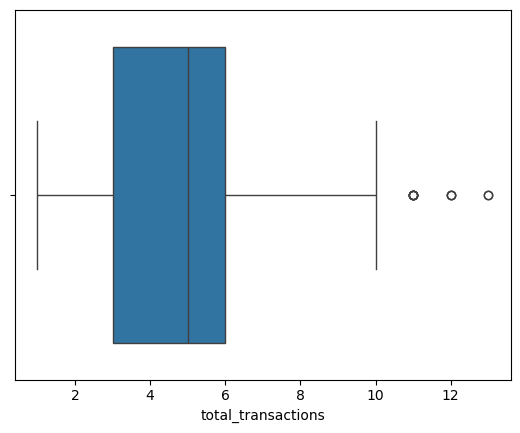

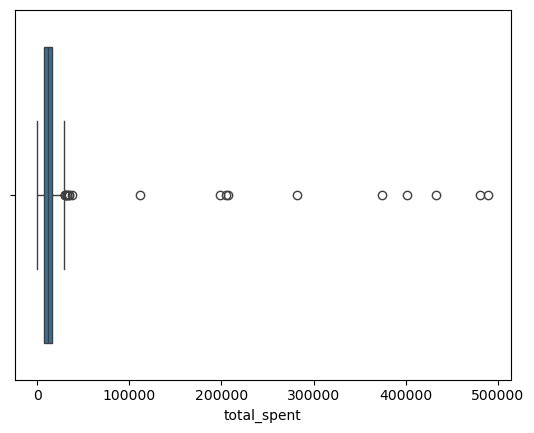

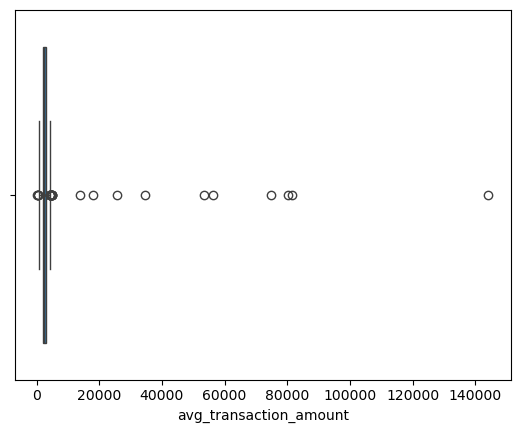

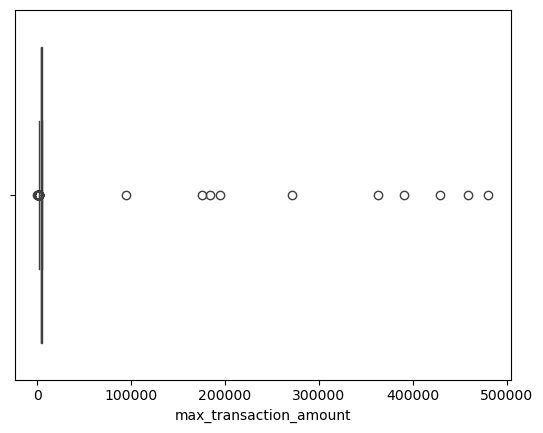

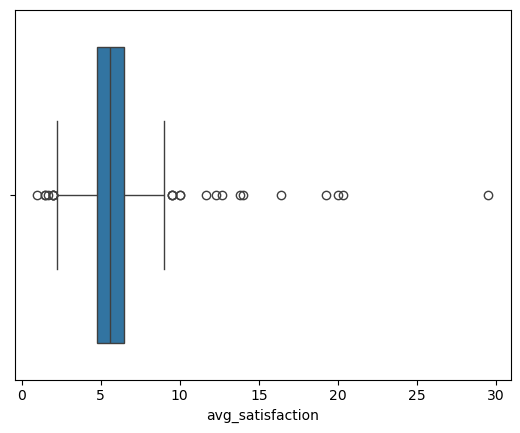

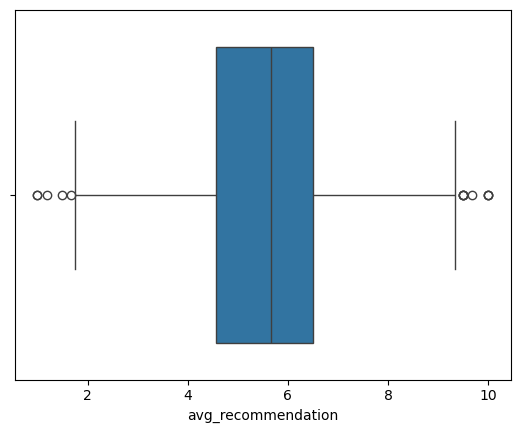

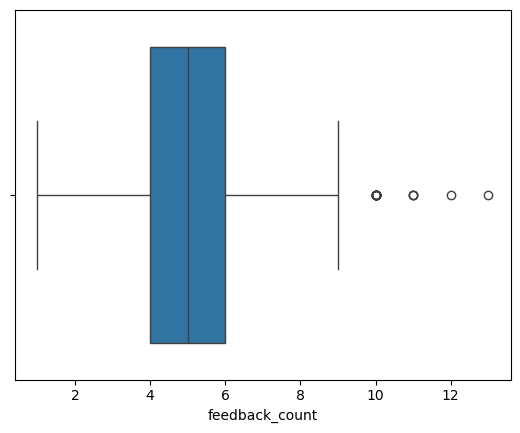

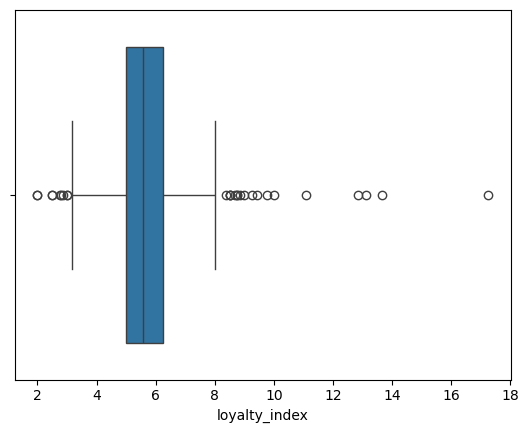

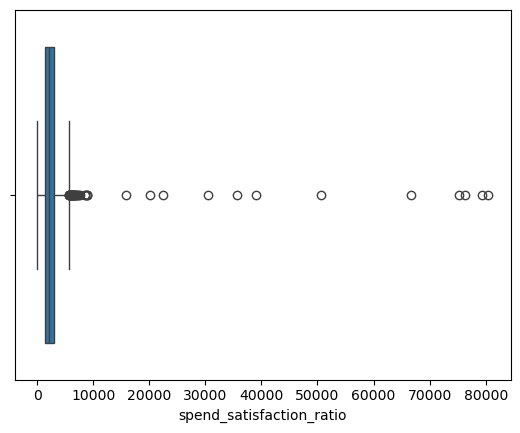

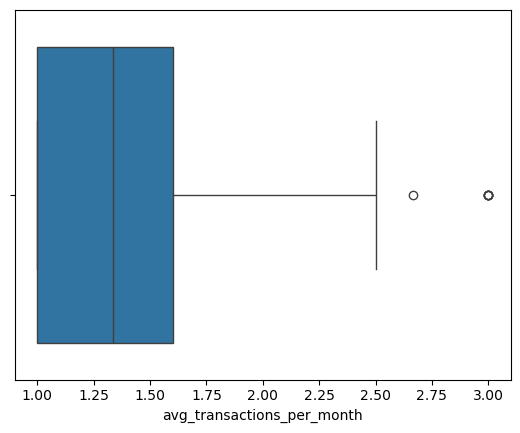

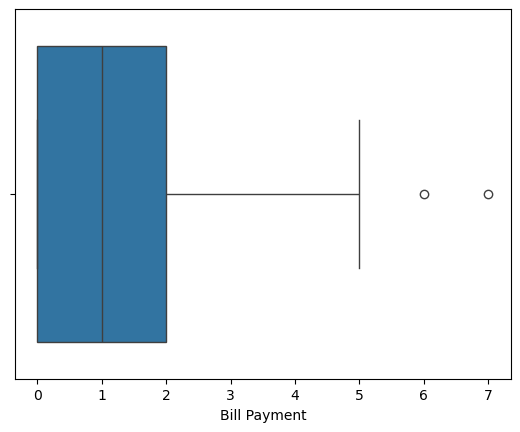

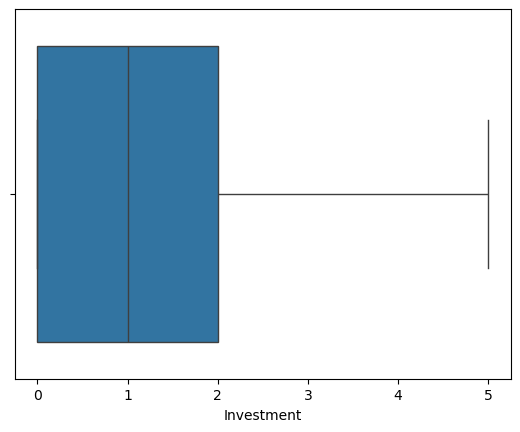

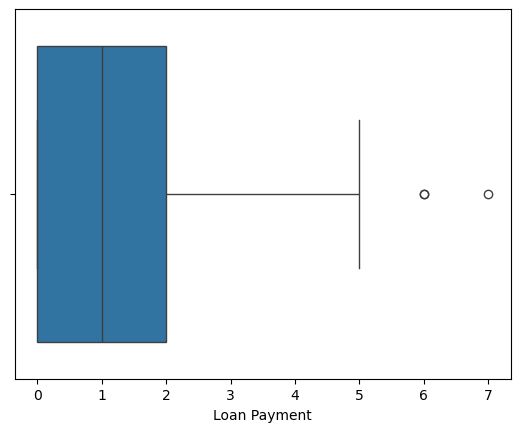

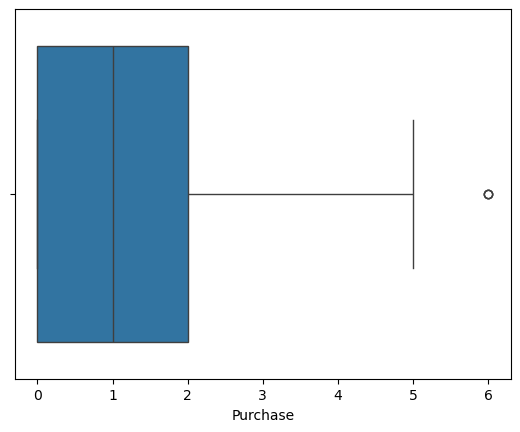

In [27]:
import warnings
warnings.filterwarnings("ignore")
for i in final_df.select_dtypes(include="number").columns:
    sns.boxplot(data=final_df,x=i)
    plt.show()

In [28]:
final_df.select_dtypes(include="number").columns

Index(['customer_id', 'total_transactions', 'total_spent',
       'avg_transaction_amount', 'max_transaction_amount', 'avg_satisfaction',
       'avg_recommendation', 'feedback_count', 'loyalty_index',
       'spend_satisfaction_ratio', 'avg_transactions_per_month',
       'Bill Payment', 'Investment', 'Loan Payment', 'Purchase'],
      dtype='object')